In [1]:
# importing all necessary libraries
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from xgboost import XGBClassifier
from sklearn import metrics    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
%matplotlib inline

In [2]:
# Reading csv file
df = pd.read_csv('loanc.csv')

In [3]:
#printing top 10 data elements of the dataframe
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,months,interest_rate,Monthly Installment,emp_title,emp_length,...,title,addr_state,debit_to_inc_ratio,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt
0,1077501,1296599,5000,5000,4975.00000,36,10.65,162.87,NaN,10+ years,...,Computer,AZ,27.65,Jan-85,1.0,13648,83.70,0.00,0.00,5861.07
1,1077430,1314167,2500,2500,2500.00000,60,15.27,59.83,Ryder,< 1 year,...,bike,GA,1.00,Apr-99,5.0,1687,9.40,0.00,0.00,1008.71
2,1077175,1313524,2400,2400,2400.00000,36,15.96,84.33,NaN,10+ years,...,real estate business,IL,8.72,1-Nov,2.0,2956,98.50,0.00,0.00,3003.65
3,1076863,1277178,10000,10000,10000.00000,36,13.49,339.31,AIR RESOURCES BOARD,10+ years,...,personel,CA,20.00,Feb-96,1.0,5598,21.00,0.00,0.00,12226.30
4,1075358,1311748,3000,3000,3000.00000,60,12.69,67.79,University Medical Group,1 year,...,Personal,OR,17.94,Jan-96,0.0,27783,53.90,766.90,766.90,3242.17
5,1075269,1311441,5000,5000,5000.00000,36,7.90,156.46,Veolia Transportaton,3 years,...,My wedding loan I promise to pay back,AZ,11.20,4-Nov,3.0,7963,28.30,0.00,0.00,5631.38
6,1069639,1304742,7000,7000,7000.00000,60,15.96,170.08,Southern Star Photography,8 years,...,Loan,NC,23.51,5-Jul,1.0,17726,85.60,1889.15,1889.15,8136.84
7,1072053,1288686,3000,3000,3000.00000,36,18.64,109.43,MKC Accounting,9 years,...,Car Downpayment,CA,5.35,7-Jan,2.0,8221,87.50,0.00,0.00,3938.14
8,1071795,1306957,5600,5600,5600.00000,60,21.28,152.39,NaN,4 years,...,Expand Business & Buy Debt Portfolio,CA,5.55,4-Apr,2.0,5210,32.60,0.00,0.00,646.02
9,1071570,1306721,5375,5375,5350.00000,60,12.69,121.45,Starbucks,< 1 year,...,Building my credit history.,TX,18.08,4-Sep,0.0,9279,36.50,0.00,0.00,1476.19


In [4]:
#printing column names
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       ' months', 'interest_rate', 'Monthly Installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'title', 'addr_state', 'debit_to_inc_ratio',
       'earliest_cr_line', 'inq_last_6mths', 'revol_bal', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_pymnt'],
      dtype='object')

In [5]:
print(df.dtypes)
print("-------------------------------------------*---------------------------------------")
print("Total count of the differnt datatypes are given below")
print(df.dtypes.value_counts())

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
 months                  int64
interest_rate          float64
Monthly Installment    float64
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
title                   object
addr_state              object
debit_to_inc_ratio     float64
earliest_cr_line        object
inq_last_6mths         float64
revol_bal                int64
revol_util             float64
out_prncp              float64
out_prncp_inv          float64
total_pymnt            float64
dtype: object
-------------------------------------------*---------------------------------------
Total count of the differnt datatypes are given below
float64    10
object      9
int64       6
dtype: int64


## Checking for Null Values

In [6]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
 months                    0
interest_rate              0
Monthly Installment        0
emp_title              51462
emp_length             44825
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
purpose                    0
title                    152
addr_state                 0
debit_to_inc_ratio         0
earliest_cr_line          29
inq_last_6mths            29
revol_bal                  0
revol_util               502
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
dtype: int64

In [7]:
df[df['emp_title'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,months,interest_rate,Monthly Installment,emp_title,emp_length,...,title,addr_state,debit_to_inc_ratio,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt
0,1077501,1296599,5000,5000,4975.00000,36,10.65,162.87,NaN,10+ years,...,Computer,AZ,27.65,Jan-85,1.0,13648,83.7,0.00,0.00,5861.07
2,1077175,1313524,2400,2400,2400.00000,36,15.96,84.33,NaN,10+ years,...,real estate business,IL,8.72,1-Nov,2.0,2956,98.5,0.00,0.00,3003.65
8,1071795,1306957,5600,5600,5600.00000,60,21.28,152.39,NaN,4 years,...,Expand Business & Buy Debt Portfolio,CA,5.55,4-Apr,2.0,5210,32.6,0.00,0.00,646.02
30,1032111,1261745,4375,4375,4375.00000,36,7.51,136.11,NaN,7 years,...,Debt Consolidation,NY,20.34,Dec-87,0.0,11210,86.9,0.00,0.00,4898.54
42,1069314,1304202,3000,3000,3000.00000,36,18.25,108.84,NaN,9 years,...,Year End Cleanup,PA,17.39,Sep-98,0.0,43936,98.1,0.00,0.00,3915.03
61,1068934,1277395,17500,8950,8925.00000,60,17.27,223.74,NaN,6 years,...,Start Up,CA,19.47,6-May,1.0,10724,58.9,2462.25,2455.34,10713.52
110,1068273,1302680,5500,5500,5500.00000,36,6.62,168.88,NaN,8 years,...,Computer Equipment,CT,9.69,Aug-94,0.0,14136,21.9,0.00,0.00,6077.88
168,1067644,1302032,2500,2500,2500.00000,36,7.51,77.78,NaN,NaN,...,GET FREE OF DEBT,CA,16.30,Aug-94,2.0,4853,42.2,0.00,0.00,1838.88
186,1067090,1301465,9000,9000,9000.00000,36,10.65,293.16,NaN,9 years,...,Credit Card Refi,SD,8.89,Sep-98,0.0,7388,71.7,0.00,0.00,10552.79
199,1061877,1293509,20000,20000,20000.00000,36,13.49,678.61,NaN,6 years,...,LC Loan,CA,22.38,Nov-98,1.0,19548,90.8,0.00,0.00,23861.58


In [8]:
df.notnull().head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,months,interest_rate,Monthly Installment,emp_title,emp_length,...,title,addr_state,debit_to_inc_ratio,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt
0,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [9]:
df.shape

(887379, 25)

## total number of classes 


In [10]:
pd.unique(df['loan_status'].values.ravel())

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [11]:
print("Amount of Classes: ", len(pd.unique(df['loan_status'].values.ravel())))

Amount of Classes:  10


In [12]:
for col in df.select_dtypes(include=['object']).columns:
    print ("Column {} has {} unique instances".format( col, len(df[col].unique())) )

Column emp_title has 299269 unique instances
Column emp_length has 12 unique instances
Column home_ownership has 6 unique instances
Column verification_status has 3 unique instances
Column loan_status has 10 unique instances
Column purpose has 14 unique instances
Column title has 63102 unique instances
Column addr_state has 51 unique instances
Column earliest_cr_line has 698 unique instances


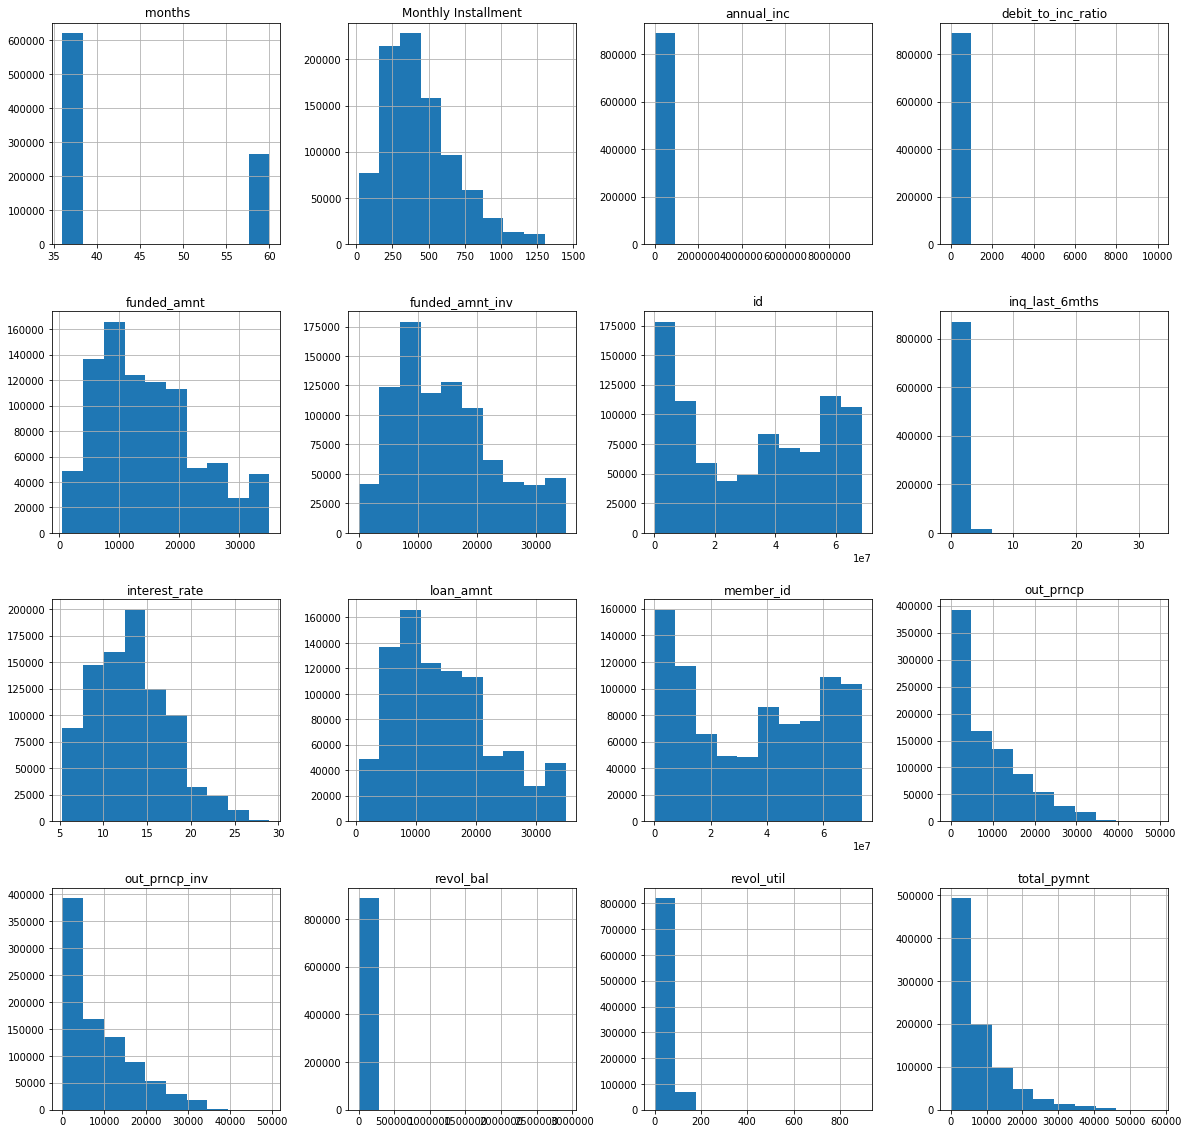

In [13]:
# Plot histograms of each parameter 
df.hist(figsize = (20, 20))
plt.show()

## Exploratory Data Analysis: What is the distribution of the loan amount?


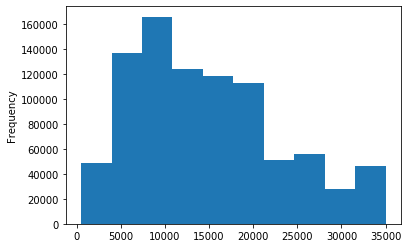

In [14]:
df['loan_amnt'].plot(kind="hist", bins=10)

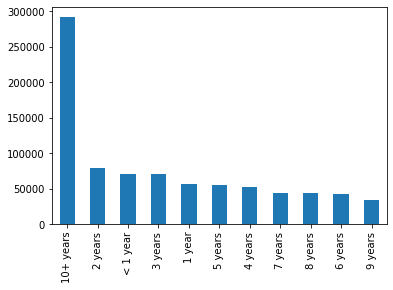

In [15]:
df['emp_length'].value_counts().plot(kind='bar')

## What is the distribution of target class?


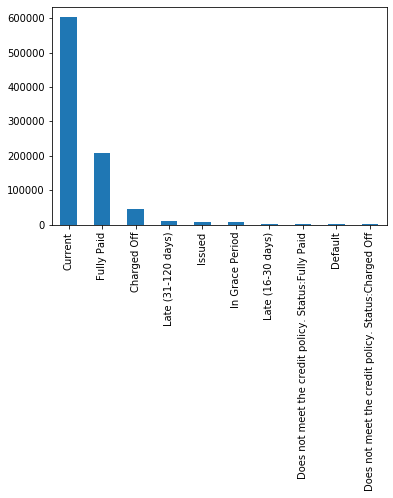

In [16]:
df['loan_status'].value_counts().plot(kind='bar')

In [17]:
df._get_numeric_data().columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       ' months', 'interest_rate', 'Monthly Installment', 'annual_inc',
       'debit_to_inc_ratio', 'inq_last_6mths', 'revol_bal', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_pymnt'],
      dtype='object')

In [18]:
df.select_dtypes(include=['object']).columns

Index(['emp_title', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'title', 'addr_state', 'earliest_cr_line'],
      dtype='object')

In [19]:
# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

emp_title              299268
emp_length                 11
home_ownership              6
verification_status         3
loan_status                10
purpose                    14
title                   63101
addr_state                 51
earliest_cr_line          697
dtype: int64

In [20]:
cat = df.select_dtypes('object')

In [21]:
print("....................................................................")
print(cat.months.value_counts())
print("....................................................................")
print(cat.emp_title.value_counts())
print("....................................................................")
print(cat.emp_length.value_counts())
print("....................................................................")
print(cat.verification_status.value_counts())
print("....................................................................")
print(cat.loan_status.value_counts())
print("....................................................................")
print(cat.purpose.value_counts())
print("....................................................................")
print(cat.title.value_counts())
print("....................................................................")
print(cat.addr_state.value_counts())
print("....................................................................")
print(cat.earliest_cr_line.value_counts())
print("....................................................................")


....................................................................


AttributeError: 'DataFrame' object has no attribute 'months'

## Encoding Categorical Variables

##### A machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

#####  * Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. An example is shown below

#####  * One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

In [22]:
cat_1hot = pd.get_dummies(cat,sparse=True)

In [23]:
non_cat = df.select_dtypes(exclude = 'object')

In [24]:
data_1hot = pd.concat([non_cat, cat_1hot], axis=1, join='inner')

In [25]:
data_1hot.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,months,interest_rate,Monthly Installment,annual_inc,debit_to_inc_ratio,...,earliest_cr_line_Sep-90,earliest_cr_line_Sep-91,earliest_cr_line_Sep-92,earliest_cr_line_Sep-93,earliest_cr_line_Sep-94,earliest_cr_line_Sep-95,earliest_cr_line_Sep-96,earliest_cr_line_Sep-97,earliest_cr_line_Sep-98,earliest_cr_line_Sep-99
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,24000.0,27.65,...,0,0,0,0,0,0,0,0,0,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,30000.0,1.00,...,0,0,0,0,0,0,0,0,0,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,12252.0,8.72,...,0,0,0,0,0,0,0,0,0,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,49200.0,20.00,...,0,0,0,0,0,0,0,0,0,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,80000.0,17.94,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y = df['loan_status']

In [27]:
y

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4             Current
5          Fully Paid
6             Current
7          Fully Paid
8         Charged Off
9         Charged Off
10         Fully Paid
11         Fully Paid
12        Charged Off
13         Fully Paid
14        Charged Off
15         Fully Paid
16         Fully Paid
17         Fully Paid
18         Fully Paid
19         Fully Paid
20         Fully Paid
21        Charged Off
22         Fully Paid
23         Fully Paid
24        Charged Off
25         Fully Paid
26        Charged Off
27        Charged Off
28         Fully Paid
29         Fully Paid
             ...     
887349        Current
887350        Current
887351    Charged Off
887352        Current
887353        Current
887354        Current
887355        Current
887356        Current
887357        Current
887358        Current
887359        Current
887360        Current
887361        Current
887362        Current
887363    

In [32]:
x = df.drop(['loan_status'],axis=1)

In [33]:
x.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,months,interest_rate,Monthly Installment,emp_title,emp_length,...,title,addr_state,debit_to_inc_ratio,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,NaN,10+ years,...,Computer,AZ,27.65,Jan-85,1.0,13648,83.7,0.00,0.00,5861.07
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,Ryder,< 1 year,...,bike,GA,1.00,Apr-99,5.0,1687,9.4,0.00,0.00,1008.71
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,NaN,10+ years,...,real estate business,IL,8.72,1-Nov,2.0,2956,98.5,0.00,0.00,3003.65
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,AIR RESOURCES BOARD,10+ years,...,personel,CA,20.00,Feb-96,1.0,5598,21.0,0.00,0.00,12226.30
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,University Medical Group,1 year,...,Personal,OR,17.94,Jan-96,0.0,27783,53.9,766.90,766.90,3242.17
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,Veolia Transportaton,3 years,...,My wedding loan I promise to pay back,AZ,11.20,4-Nov,3.0,7963,28.3,0.00,0.00,5631.38
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,Southern Star Photography,8 years,...,Loan,NC,23.51,5-Jul,1.0,17726,85.6,1889.15,1889.15,8136.84
7,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,MKC Accounting,9 years,...,Car Downpayment,CA,5.35,7-Jan,2.0,8221,87.5,0.00,0.00,3938.14
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,NaN,4 years,...,Expand Business & Buy Debt Portfolio,CA,5.55,4-Apr,2.0,5210,32.6,0.00,0.00,646.02
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,Starbucks,< 1 year,...,Building my credit history.,TX,18.08,4-Sep,0.0,9279,36.5,0.00,0.00,1476.19


## Feature Selection 

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns) 
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs', 'Score'] #naming the dataframe columns

ValueError: could not convert string to float: 'Ryder'

In [ ]:
print(featureScores.nlargest(10, 'Score')) #print 10 best features

In [ ]:
featureScores.nlargest(10, 'Score').plot(kind='barh')
plt.savefig('chi2.png')

In [ ]:
###Feature Importance 
###It gives a score for each feature of data,the higher the score more important or relevants is the feature towards your output variable.
###Its an inbuilt class that comes with Tree based classifiers, we will be using extra tree Classifier for extacting the top features for the dataset.
### as we can see credit_amount has the most highest score among all the features.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
plt.figure(figsize=(7, 6), dpi=100)
#plot graph of features importances for better visulization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.savefig('extra.png',dpi=100)
plt.show()

## Pre-processing the data and scaling 


In [ ]:
X = df.drop("loan_status", axis=1, inplace = False)
y = df.loan_status

In [ ]:
y.head()

In [ ]:
df.select_dtypes(include=['object']).columns

## Encoding Categorical Variables